In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
time_steps = 1000
arm_distribution = {}
no_of_arms = 10

In [3]:
optimal_action = -1
maxi = -1e9
for i in range(10):
   q_true =  np.random.normal(0, 1)
   if(q_true > maxi):
      maxi = q_true
      optimal_action = i
   arm_distribution[i] = (q_true, 4)

In [4]:
def epsilon_greedy(e, time_steps, no_of_arms):
    q_arms = np.zeros(no_of_arms)
    count_arms = np.zeros(no_of_arms)
    rewards = []
    action_sequence = []
    for t in range(time_steps):
        if np.random.rand() < e:
            action = np.random.choice(no_of_arms)
            if(optimal_action == action):
                action_sequence.append(1)
            else:
                action_sequence.append(0)

        else:
            action = np.argmax(q_arms)
            if(optimal_action == action):
                action_sequence.append(1)
            else:
                action_sequence.append(0)
        reward_t = np.random.normal(arm_distribution[action][0], arm_distribution[action][1])
        rewards.append(reward_t)
        
        count_arms[action] += 1
        q_arms[action] = q_arms[action]  + ((reward_t - q_arms[action])/count_arms[action])
    return np.array(rewards), np.array(action_sequence)

In [5]:
def plot_rewards(time_steps, no_of_arms):
    xis = range(1, time_steps+1)
    plt.figure(figsize=(20, 4))
    actions_plot = []
    for e in (0.1, 0.01, 0):
        rewards_2000 = []
        action_2000 = []
        for i in range(2000):
            reward_sequence, action_sequence = epsilon_greedy(e, time_steps, no_of_arms)
            rewards_2000.append(reward_sequence)
            action_2000.append(action_sequence)
        np.array(rewards_2000)
        np.array(action_2000)
        average_rewards2000 = np.mean(rewards_2000, axis= 0)
        average_actions2000 = 100*np.mean(action_2000, axis= 0)
        actions_plot.append(average_actions2000)
        plt.plot(xis, average_rewards2000, label = f'epsilon = {e}')
    plt.xlabel('Time Steps')
    plt.ylabel('Reward')
    plt.legend()
    plt.show()

    plt.figure(figsize=(20, 4))
    plt.plot(xis, actions_plot[0], label = f'epsilon = {0.1}')
    plt.plot(xis, actions_plot[1], label = f'epsilon = {0.01}')
    plt.plot(xis, actions_plot[2], label = f'epsilon = {0}')

    plt.xlabel('Time Steps')
    plt.ylabel('Optimal Action percentage')
    plt.legend()
    plt.show()

    



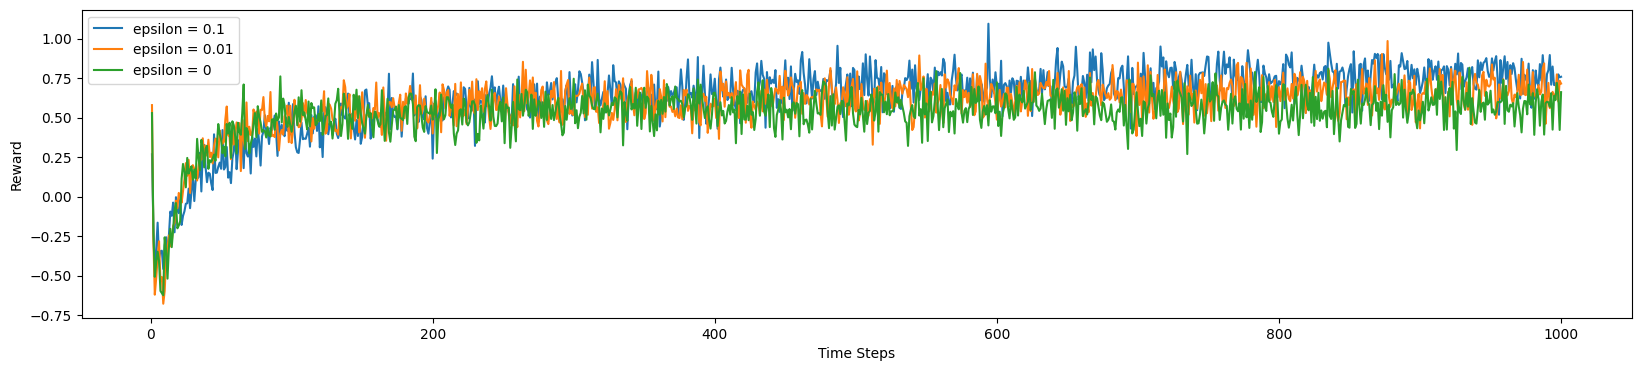

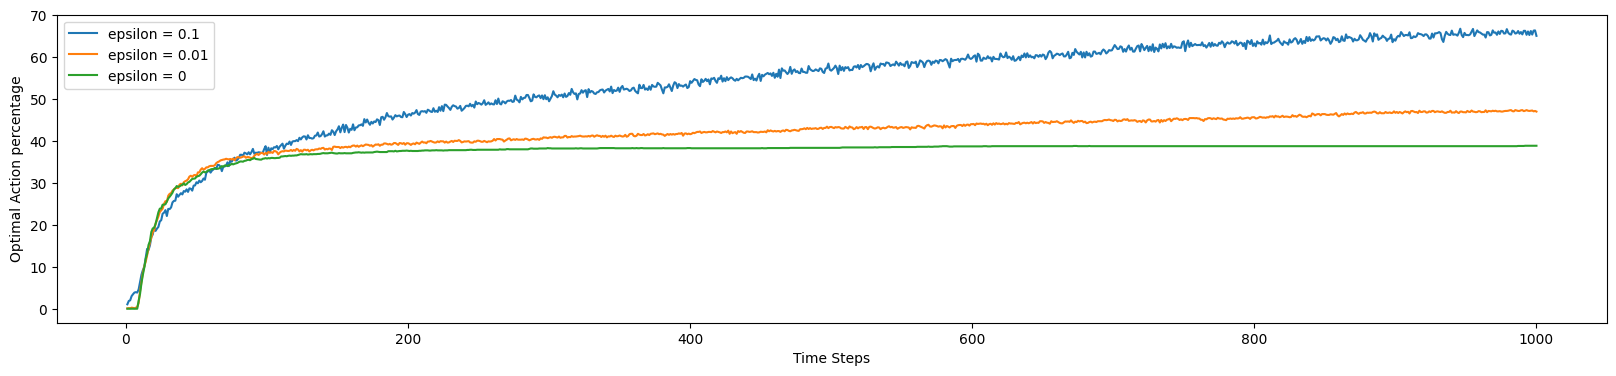

In [6]:
plot_rewards(time_steps, no_of_arms)